<a href="https://colab.research.google.com/github/Vikrant096/FAKE-NEWS-DETECTION/blob/main/fake_news_clear_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

In [5]:
from google.colab import files
uploaded = files.upload()


Saving WELFake_Dataset.csv to WELFake_Dataset.csv


In [8]:
df=pd.read_csv("WELFake_Dataset.csv")
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [9]:
df_final=df[:10000]
df_final.to_csv('fake_news_final.csv', index=False)

In [ ]:
df_final

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
9995,9995,Yemen's Saleh ready to turn new page if Saudi-...,DUBAI (Reuters) - Former Yemeni President Ali ...,0
9996,9996,Anonymous Hacker Fighting For Justina Pelletie...,We Are Change \nActivist and alleged Anonymous...,1
9997,9997,"Hot-Air Balloon Crash in Texas Kills 16, Offic...","LOCKHART, Tex. — A balloon carrying 16 pe...",0
9998,9998,Palme d’Or Goes to a Ken Loach Film at Cannes ...,"CANNES, France — The 69th Cannes Film Festi...",0


In [10]:
df_final.columns
df_final.rename(columns={'Unnamed: 0': 'Index', 'title': 'News Headline', 'text': 'Complete News', 'label': 'Fake News(Yes/No)'}, inplace=True)
df_final

<ipython-input-10-25406286a6a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.rename(columns={'Unnamed: 0': 'Index', 'title': 'News Headline', 'text': 'Complete News', 'label': 'Fake News(Yes/No)'}, inplace=True)


,Index,News Headline,Complete News,Fake News(Yes/No)
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
9995,9995,Yemen's Saleh ready to turn new page if Saudi-...,DUBAI (Reuters) - Former Yemeni President Ali ...,0
9996,9996,Anonymous Hacker Fighting For Justina Pelletie...,We Are Change \nActivist and alleged Anonymous...,1
9997,9997,"Hot-Air Balloon Crash in Texas Kills 16, Offic...","LOCKHART, Tex. — A balloon carrying 16 pe...",0
9998,9998,Palme d’Or Goes to a Ken Loach Film at Cannes ...,"CANNES, France — The 69th Cannes Film Festi...",0


In [46]:
df_final

,Index,News Headline,Complete News,Fake News(Yes/No),Source,Publish Dates,word_count,character_count
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,The Guardian,2020-01-01,871,4109
1,1,NaN,Did they post their votes for Hillary already?,1,Reddit,2023-03-15,8,39
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,BBC,2022-08-10,34,179
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,Instagram,2021-11-22,1321,6721
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,The Guardian,2019-04-07,329,1588
...,...,...,...,...,...,...,...,...
9995,9995,Yemen's Saleh ready to turn new page if Saudi-...,DUBAI (Reuters) - Former Yemeni President Ali ...,0,The Guardian,2023-07-02,71,320
9996,9996,Anonymous Hacker Fighting For Justina Pelletie...,We Are Change \nActivist and alleged Anonymous...,1,Fox News,2019-11-20,1345,6964
9997,9997,"Hot-Air Balloon Crash in Texas Kills 16, Offic...","LOCKHART, Tex. — A balloon carrying 16 pe...",0,TikTok,2021-01-11,1278,6036
9998,9998,Palme d’Or Goes to a Ken Loach Film at Cannes ...,"CANNES, France — The 69th Cannes Film Festi...",0,The Guardian,2020-05-27,563,2837


In [ ]:
df_temp=df_final[: 10]
df_temp

,Index,News Headline,Complete News,Fake News(Yes/No)
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [ ]:
df_final['News Headline'] = df_final['News Headline'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.upper()
df_final['Complete News'] = df_final['Complete News'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.lower()
df_final

<ipython-input-23-dc97eabb136f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['News Headline'] = df_final['News Headline'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.upper()
<ipython-input-23-dc97eabb136f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Complete News'] = df_final['Complete News'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.lower()


,Index,News Headline,Complete News,Fake News(Yes/No)
0,0,LAW ENFORCEMENT ON HIGH ALERT FOLLOWING THREAT...,no comment is expected from barack obama membe...,1
1,1,NaN,did they post their votes for hillary already,1
2,2,UNBELIEVABLE OBAMAS ATTORNEY GENERAL SAYS MOST...,now most of the demonstrators gathered last n...,1
3,3,BOBBY JINDAL RAISED HINDU USES STORY OF CHRIST...,a dozen politically active pastors came here f...,0
4,4,SATAN RUSSIA UNVELIS AN IMAGE OF ITS TERRIFYI...,the rs sarmat missile dubbed satan will repla...,1
...,...,...,...,...
9995,9995,YEMENS SALEH READY TO TURN NEW PAGE IF SAUDILE...,dubai reuters former yemeni president ali abd...,0
9996,9996,ANONYMOUS HACKER FIGHTING FOR JUSTINA PELLETIE...,we are change \nactivist and alleged anonymous...,1
9997,9997,HOTAIR BALLOON CRASH IN TEXAS KILLS OFFICIALS...,lockhart tex a balloon carrying people ...,0
9998,9998,PALME DOR GOES TO A KEN LOACH FILM AT CANNES ...,cannes france the th cannes film festival ...,0


In [ ]:
df_final['Fake News(Yes/No)'] = df_final['Fake News(Yes/No)'].where(df_final['Fake News(Yes/No)'].isin([0, 1]), 1)

<ipython-input-24-ff51c8e440a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Fake News(Yes/No)'] = df_final['Fake News(Yes/No)'].where(df_final['Fake News(Yes/No)'].isin([0, 1]), 1)


In [21]:
def count_words(text):
    return len(str(text).split())
# Function to count characters excluding spaces in a text
def count_characters(text):
    return len(str(text).replace(' ', ''))  # Removes spaces before counting
# Apply the functions to the 'text_column'
df_final['word_count'] = df_final['Complete News'].apply(count_words)
df_final['character_count'] = df_final['Complete News'].apply(count_characters)
df_final

<ipython-input-21-64a34af7df39>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['word_count'] = df_final['Complete News'].apply(count_words)
<ipython-input-21-64a34af7df39>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['character_count'] = df_final['Complete News'].apply(count_characters)


,Index,News Headline,Complete News,Fake News(Yes/No),Source,Publish Dates,word_count,character_count
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,The Guardian,2020-01-01,871,4109
1,1,NaN,Did they post their votes for Hillary already?,1,Reddit,2023-03-15,8,39
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,BBC,2022-08-10,34,179
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,Instagram,2021-11-22,1321,6721
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,The Guardian,2019-04-07,329,1588
...,...,...,...,...,...,...,...,...
9995,9995,Yemen's Saleh ready to turn new page if Saudi-...,DUBAI (Reuters) - Former Yemeni President Ali ...,0,The Guardian,2023-07-02,71,320
9996,9996,Anonymous Hacker Fighting For Justina Pelletie...,We Are Change \nActivist and alleged Anonymous...,1,Fox News,2019-11-20,1345,6964
9997,9997,"Hot-Air Balloon Crash in Texas Kills 16, Offic...","LOCKHART, Tex. — A balloon carrying 16 pe...",0,TikTok,2021-01-11,1278,6036
9998,9998,Palme d’Or Goes to a Ken Loach Film at Cannes ...,"CANNES, France — The 69th Cannes Film Festi...",0,The Guardian,2020-05-27,563,2837


In [18]:
df_final['Publish Dates'] = ['1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024', '1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                             '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                             '21/12/2021','22/10/2023',                            '1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024',                            '1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                            '2/3/2023','23/8/2024','7/10/2023','10/12/2022','25/2/2023','15/7/2021',
                            '19/10/2023','21/5/2023','23/9/2023','24/6/2024','13/3/2022','21/1/2022',
                            '9/2/2022','16/2/2022','25/12/2021','18/8/2021','28/4/2022','11/10/2020',
                            '3/8/2021','2/9/2023','25/5/2023','7/11/2021','10/6/2024','18/1/2022',
                            '20/3/2022','24/12/2023','26/9/2020','19/1/2020','22/8/2021','16/11/2019',
                            '13/10/2021','2/6/2024','27/3/2023','21/12/2021','22/10/2023','29/4/2023',
                            '9/1/2023','3/12/2023','17/1/2023','23/2/2023','14/7/2024','9/7/2020',
                            '28/5/2021','11/4/2024','13/2/2024','2/12/2022','16/3/2020','20/7/2024',
                            '18/2/2022','3/10/2022','11/7/2023','28/1/2020','2/5/2022','19/11/2023',
                            '16/6/2023','22/2/2024','30/12/2023','21/3/2023','7/3/2023','5/4/2020',
                            '30/7/2021','18/12/2022','11/6/2024','13/11/2019','14/6/2021','6/2/2023',
                            '17/11/2022','20/10/2023','27/4/2024','9/7/2023','30/4/2020','16/5/2020',
                            '25/4/2024','11/8/2022','22/2/2023','6/11/2020','25/3/2024','3/9/2021',
                            '19/7/2023','24/10/2023','13/5/2022','4/9/2021','12/4/2024','26/12/2022',
                            '21/7/2021','20/12/2020','29/3/2020','19/1/2021','6/10/2020','10/9/2022',
                            '21/4/2023','17/6/2021','4/8/2023','15/3/2023','17/12/2018','29/5/2022',
                            '13/3/2021','22/1/2020','24/2/2022','29/6/2020','7/11/2023','5/6/2023',
                            '#11/2/2024','4/5/2023','27/7/2021','3/11/2023','9/1/2022','19/12/2022',
                            '14/2/2021','22/11/2020','25/1/2022','28/5/2021','7/5/2023','29/11/2020',
                            '1/4/2023','22/12/2022','4/6/2022','14/1/2024','5/7/2021','1/12/2020',
                            '9/2/2021','12/5/2023','13/6/2023','23/5/2023','17/8/2021','20/12/2023',
                            '2/4/2022','4/1/2021','26/1/2024','21/2/2022','27/6/2022','8/10/2021',
                            '28/9/2021','14/2/2020','20/6/2024','20/6/2024','1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',
                            '12/7/2022','4/9/2019','21/10/2020','16/2/2021','5/11/2018','23/1/2023',
                            '31/5/2019','28/7/2020','17/3/2021','19/8/2024','11/2/2022','18/9/2020',
                            '6/6/2024','27/12/2019','10/9/2023','3/2/2022','17/4/2018','26/5/2023',
                            '14/12/2022','25/6/2020','1/8/2019','9/10/2021','22/7/2023','30/3/2022',
                            '2/5/2024','5/8/2020','23/12/2021','16/7/2023','12/4/2022','13/9/2024',
                            '9/12/2022','20/5/2021','3/6/2020','15/11/2023','4/8/2021','17/5/2023',
                            '7/7/2021','22/6/2024','29/1/2019','14/11/2023','16/8/2020','30/3/2021',
                            '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020','21/3/2022','16/10/2019',
                            '17/12/2020','28/6/2024','12/2/2023','25/10/2020','4/10/2022','1/6/2019',
                            '15/4/2023','22/9/2021','29/7/2020','14/9/2022','9/1/2024','26/7/2023',
                            '3/4/2022','23/11/2023','29/3/2021','10/4/2020','11/5/2021','1/5/2024',
                            '16/7/2022','7/2/2023','20/4/2023','4/2/2024','17/9/2021','8/5/2021',
                            '18/7/2020','2/11/2020','22/3/2022','17/1/2021','12/11/2022','8/4/2023',
                            '25/1/2024','1/11/2023','24/9/2021','5/2/2021','27/10/2021','30/9/2024',
                            '4/5/2021','16/5/2022','17/10/2022','3/9/2023','18/12/2019','10/5/2020',
                           '12/9/2020','29/9/2022','27/8/2023','24/12/2022','15/6/2022','1/10/2023',
                            '5/12/2022','6/9/2021','3/1/2024','12/6/2021','21/12/2023','9/3/2020',
                            '8/7/2023','11/12/2022','15/8/2022','19/5/2022','13/1/2020','26/6/2021',
                            '5/10/2020','25/9/2022','10/7/2020','11/8/2021','23/1/2021','3/8/2023',
                            '22/4/2022','12/1/2022','1/9/2021','8/3/2024','13/8/2022','21/11/2020',
                            '25/7/2020','28/11/2023','1/5/2022','4/7/2022','29/12/2023','22/1/2021',
                            '14/4/2023','28/4/2024','27/2/2023','15/7/2023','12/4/2020','13/7/2020',
                            '16/1/2023','30/12/2021','9/8/2021','25/8/2021','17/10/2021','11/9/2022',
                            '10/12/2020','23/6/2023','4/1/2023','8/12/2021','18/10/2020','17/3/2020',
                             '3/5/2022','4/11/2018','13/6/2020','22/5/2022','6/1/2020','28/2/2021',
                            '15/9/2023','26/11/2019','9/4/2024','24/8/2022','11/3/2019','23/12/2020',
                            '19/9/2024','29/8/2021','10/6/2019','24/5/2022','17/2/2024','2/7/2023',
                            '20/11/2019','11/1/2021','27/5/2020','3/12/2020'
                            ]

<ipython-input-18-5e6fb174a920>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Publish Dates'] = ['1/1/2020','15/3/2023','10/8/2022','22/11/2021','7/4/2019','14/6/2024',


In [54]:
df_final

,Index,News Headline,Complete News,Fake News(Yes/No),Source,Publish Dates,word_count,character_count
0,0,LAW ENFORCEMENT ON HIGH ALERT FOLLOWING THREAT...,no comment is expected from barack obama membe...,1,The Guardian,2020-01-01,867,3897
2,2,UNBELIEVABLE OBAMAS ATTORNEY GENERAL SAYS MOST...,now most of the demonstrators gathered last n...,1,BBC,2022-08-10,34,177
3,3,BOBBY JINDAL RAISED HINDU USES STORY OF CHRIST...,a dozen politically active pastors came here f...,0,Instagram,2021-11-22,1311,6478
4,4,SATAN RUSSIA UNVELIS AN IMAGE OF ITS TERRIFYI...,the rs sarmat missile dubbed satan will repla...,1,The Guardian,2019-04-07,310,1468
5,5,ABOUT TIME CHRISTIAN GROUP SUES AMAZON AND SPL...,all we can say on this one is it s about time ...,1,Fox News,2024-06-14,244,1235
...,...,...,...,...,...,...,...,...
9995,9995,YEMENS SALEH READY TO TURN NEW PAGE IF SAUDILE...,dubai reuters former yemeni president ali abd...,0,The Guardian,2023-07-02,70,312
9996,9996,ANONYMOUS HACKER FIGHTING FOR JUSTINA PELLETIE...,we are change \nactivist and alleged anonymous...,1,Fox News,2019-11-20,1321,6706
9997,9997,HOTAIR BALLOON CRASH IN TEXAS KILLS OFFICIALS...,lockhart tex a balloon carrying people ...,0,TikTok,2021-01-11,1246,5765
9998,9998,PALME DOR GOES TO A KEN LOACH FILM AT CANNES ...,cannes france the th cannes film festival ...,0,The Guardian,2020-05-27,556,2676


In [55]:
df_final.columns

Index(['Index', 'News Headline', 'Complete News', 'Fake News(Yes/No)',
       'Source', 'Publish Dates', 'word_count', 'character_count'],
      dtype='object')

!pip install torch torchvision
!pip install --upgrade transformers
from transformers import pipeline

# Initialize pipelines
sentiment_analysis = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
#category_pipeline = pipeline("zero-shot-classification", model="facebook/distilbart-mnli")


# Define categories with "Others"
categories = ["Politics", "Sports", "Technology", "Health", "Entertainment"]

# Function to get sentiment
def analyze_sentiment(text):
    sentiment_result = sentiment_analysis(text)
    return sentiment_result[0]['label']

# Function to get category
def classify_category(text):
    classification_result = category_pipeline(text, candidate_labels=categories)
    labels = classification_result['labels']

# Apply the functions to DataFrame
df_temp['Sentiment'] = df_temp['Complete News'].apply(analyze_sentiment)
#df_temp['Category'] = df_temp['Complete News'].apply(classify_category)
df_temp

For an auto data-cleaning pipeline for your fake news detection dataset, the script should include the following steps and components:

1. Handling Missing Values
Drop or Impute Missing Data:

Check for missing values in all columns.

Decide on a strategy: Drop rows/columns with excessive missing data or fill them with appropriate values (e.g., mean, median, mode, or placeholders like "Unknown").

Specific to Your Columns:

Handle missing dates in Publish Dates.

Ensure no critical fields (News Headline, Complete News, Fake News(Yes/No)) are missing.

2. Removing Duplicates
Check for duplicate rows based on News Headline and Complete News.

Drop duplicates to avoid biased training or testing.

3. Stop Word Removal and Text Cleaning
Remove stop words from News Headline and Complete News.

Standardize text by:

Converting to lowercase.

Removing special characters, numbers, and punctuation.

Expanding contractions (e.g., "isn't" to "is not").

Removing extra whitespace.

4. Tokenization and Lemmatization
Tokenize text data into words.

Apply lemmatization to reduce words to their base forms (e.g., "running" → "run").

5. Feature Engineering
Word Count and Character Count:

Ensure word_count and character_count match the processed text.

Extract Date Features:

From Publish Dates, create features like year, month, day, and day of week.

NLP-Based Features:

Add features such as:

Sentiment scores.

Readability scores.

Named Entity Recognition (NER).

6. Handling Fake News(Yes/No) Column
Ensure consistent formatting (e.g., all "Yes" and "No" values standardized).

Convert to binary (e.g., 1 for "Yes" and 0 for "No") for modeling.

7. Outlier Detection and Removal
Detect and handle outliers in word_count and character_count columns.

8. Date Validation
Ensure Publish Dates are valid.

Parse the dates into a standard datetime format.

Flag or correct invalid or out-of-range dates.

9. Normalization and Scaling
Normalize word_count and character_count for consistent range (if needed for ML models).

10. Logging and Error Handling
Log issues such as invalid dates, missing values, or outliers for review.

Ensure the pipeline handles unexpected errors gracefully.

11. Optional Enhancements
Language Detection:

Detect and filter out non-English news articles.

Text Length Filters:

Remove articles with extremely low word or character counts.

Domain-Specific Keywords:

Highlight or flag articles containing domain-specific fake news keywords.

In [15]:
df_final['Source']=[
    'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok',
    'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
    'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
    'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
    'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News','Fox News', 'TikTok',
'The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN', 'Instagram', 'Twitter', 'Fox News', 'Reddit', 'BBC', 'Reddit', 'Reddit', 'Fox News',
    'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian', 'TikTok', 'Twitter', 'Instagram', 'TikTok', 'TikTok', 'Fox News', 'CNN', 'BBC', 'The Guardian', 'TikTok', 'Facebook', 'The New York Times', 'Reddit', 'The Guardian', 'Al Jazeera', 'Facebook', 'BBC', 'CNN', 'Twitter', 'Fox News', 'TikTok', 'Facebook', 'Al Jazeera', 'Reddit', 'BBC', 'Al Jazeera', 'CNN','The Guardian', 'Reddit', 'BBC', 'Instagram', 'The Guardian', 'Fox News', 'TikTok', 'The Guardian', 'The Guardian'
]
df_final

<ipython-input-15-5b2a650a61ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Source']=[


,Index,News Headline,Complete News,Fake News(Yes/No),Source
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,The Guardian
1,1,NaN,Did they post their votes for Hillary already?,1,Reddit
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,BBC
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,Instagram
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,The Guardian
...,...,...,...,...,...
9995,9995,Yemen's Saleh ready to turn new page if Saudi-...,DUBAI (Reuters) - Former Yemeni President Ali ...,0,The Guardian
9996,9996,Anonymous Hacker Fighting For Justina Pelletie...,We Are Change \nActivist and alleged Anonymous...,1,Fox News
9997,9997,"Hot-Air Balloon Crash in Texas Kills 16, Offic...","LOCKHART, Tex. — A balloon carrying 16 pe...",0,TikTok
9998,9998,Palme d’Or Goes to a Ken Loach Film at Cannes ...,"CANNES, France — The 69th Cannes Film Festi...",0,The Guardian


In [52]:
df_final.to_csv('fake_news_final.csv', index=False)

In [53]:
# Clean the dataset based on given rules
def clean_data(df):
    # 1. Keep only the specified columns
    required_columns = ['Index', 'News Headline', 'Complete News', 'Fake News(Yes/No)', 'word_count', 'character_count', 'Publish Dates', 'Source']
    if list(df.columns) != required_columns:
        print("Columns do not match the required list or order.")
        # 2. Remove rows with empty 'News Headline' or 'Complete News'
    df.dropna(subset=['News Headline', 'Complete News'], inplace=True)
    # Convert 'News Headline' to uppercase and 'Complete News' to lowercase
    df['News Headline'] = df['News Headline'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.upper()
    df['Complete News'] = df['Complete News'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.lower()
    # 3. Ensure 'Fake News(Yes/No)' contains only 1 or 0, replacing invalid values with 0
    df['Fake News(Yes/No)'] = df['Fake News(Yes/No)'].where(df['Fake News(Yes/No)'].isin([0, 1]), 1)
    # 4. Calculate missing 'word_count' and 'character_count'
    def count_words(text):
        return len(str(text).split())
# Function to count characters excluding spaces in a text
    def count_characters(text):
        return len(str(text).replace(' ', ''))  # Removes spaces before counting
# Apply the functions to the 'text_column'
    df['word_count'] = df['Complete News'].apply(count_words)
    df['character_count'] = df['Complete News'].apply(count_characters)
        # 5. Handle 'Publish Dates'
    # Drop rows where 'Publish Dates' is NaN (invalid or missing dates)
    df['Publish Dates'] = pd.to_datetime(df['Publish Dates'], format='mixed' , errors='coerce')
    df.dropna(subset=['Publish Dates'], inplace = True)
    # 6. Handle 'Source' column
    df.loc[df['Source'].isna(), 'Fake News(Yes/No)'] = 1
    for item in df.index:
        if df.at[item, 'word_count']==0:
            df.drop(item, inplace=True)
    for item in df.index:
        if df.at[item, 'character_count']==0:
            df.drop(item, inplace=True)
clean_data(df_final)
df_final

Columns do not match the required list or order.


<ipython-input-53-8aa70bf090ca>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['News Headline', 'Complete News'], inplace=True)
<ipython-input-53-8aa70bf090ca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['News Headline'] = df['News Headline'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.upper()
<ipython-input-53-8aa70bf090ca>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,Index,News Headline,Complete News,Fake News(Yes/No),Source,Publish Dates,word_count,character_count
0,0,LAW ENFORCEMENT ON HIGH ALERT FOLLOWING THREAT...,no comment is expected from barack obama membe...,1,The Guardian,2020-01-01,867,3897
2,2,UNBELIEVABLE OBAMAS ATTORNEY GENERAL SAYS MOST...,now most of the demonstrators gathered last n...,1,BBC,2022-08-10,34,177
3,3,BOBBY JINDAL RAISED HINDU USES STORY OF CHRIST...,a dozen politically active pastors came here f...,0,Instagram,2021-11-22,1311,6478
4,4,SATAN RUSSIA UNVELIS AN IMAGE OF ITS TERRIFYI...,the rs sarmat missile dubbed satan will repla...,1,The Guardian,2019-04-07,310,1468
5,5,ABOUT TIME CHRISTIAN GROUP SUES AMAZON AND SPL...,all we can say on this one is it s about time ...,1,Fox News,2024-06-14,244,1235
...,...,...,...,...,...,...,...,...
9995,9995,YEMENS SALEH READY TO TURN NEW PAGE IF SAUDILE...,dubai reuters former yemeni president ali abd...,0,The Guardian,2023-07-02,70,312
9996,9996,ANONYMOUS HACKER FIGHTING FOR JUSTINA PELLETIE...,we are change \nactivist and alleged anonymous...,1,Fox News,2019-11-20,1321,6706
9997,9997,HOTAIR BALLOON CRASH IN TEXAS KILLS OFFICIALS...,lockhart tex a balloon carrying people ...,0,TikTok,2021-01-11,1246,5765
9998,9998,PALME DOR GOES TO A KEN LOACH FILM AT CANNES ...,cannes france the th cannes film festival ...,0,The Guardian,2020-05-27,556,2676


In [56]:
df_final.to_csv('fake_news_final.csv', index=False)

In [57]:
df_final.isnull().sum()

,0
Index,0
News Headline,0
Complete News,0
Fake News(Yes/No),0
Source,0
Publish Dates,0
word_count,0
character_count,0


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x = df_final['Complete News']
y = df_final['Fake News(Yes/No)']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pickle

In [62]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [63]:
pred_lr = model.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1168
           1       0.92      0.93      0.92      1278

    accuracy                           0.92      2446
   macro avg       0.92      0.92      0.92      2446
weighted avg       0.92      0.92      0.92      2446



In [64]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [65]:
pred_dt = model.predict(x_test)

In [66]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1219
           1       0.89      0.94      0.91      1227

    accuracy                           0.91      2446
   macro avg       0.91      0.91      0.91      2446
weighted avg       0.91      0.91      0.91      2446



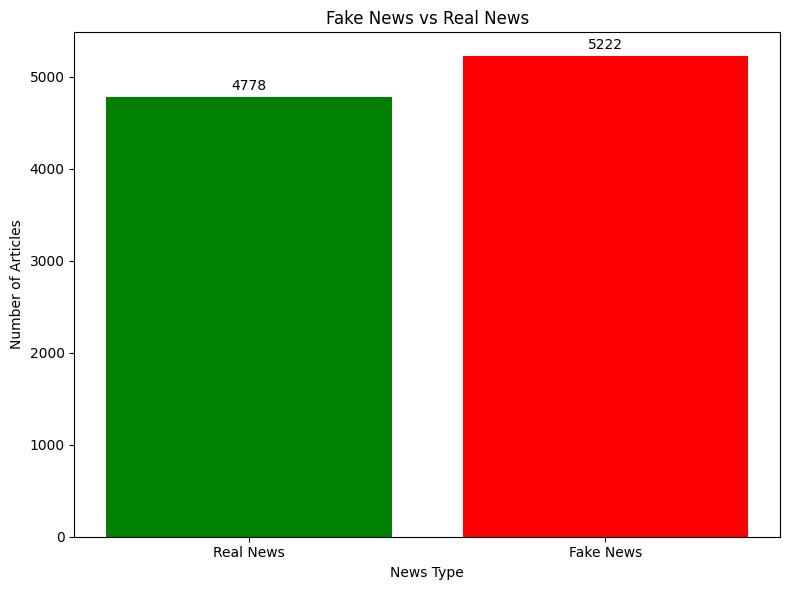

In [13]:
import matplotlib.pyplot as plt

# Count fake and real news
news_counts = df_final['Fake News(Yes/No)'].value_counts()
labels = ['Real News', 'Fake News']
values = [news_counts[0], news_counts[1]]

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['green', 'red'])
plt.title('Fake News vs Real News')
plt.xlabel('News Type')
plt.ylabel('Number of Articles')

# Annotate the bars with values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


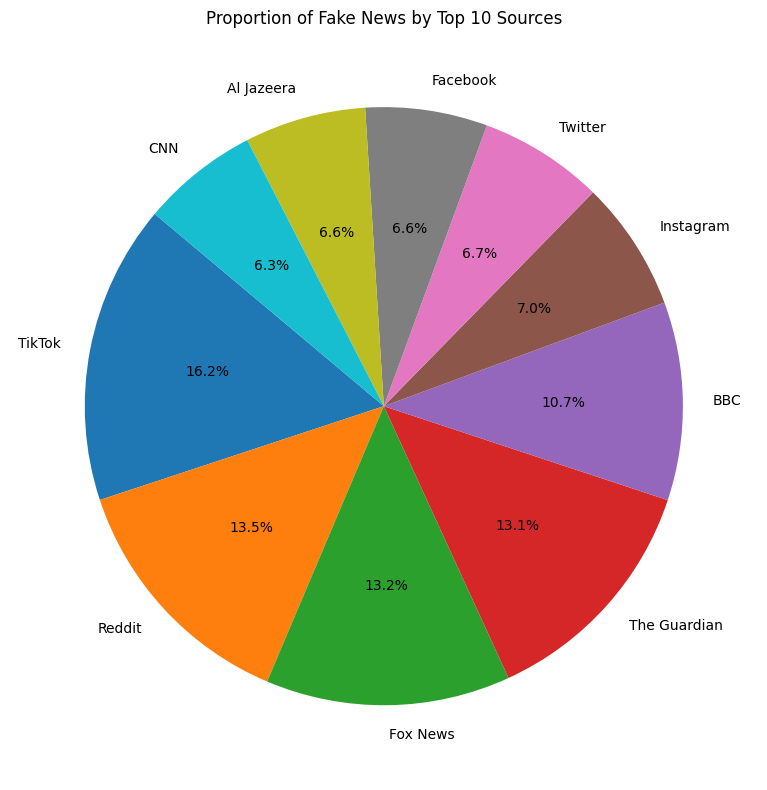

In [16]:
import matplotlib.pyplot as plt


fake_by_source = df_final[df_final['Fake News(Yes/No)'] == 1]['Source'].value_counts().head(10)


plt.figure(figsize=(8, 8))
plt.pie(fake_by_source.values, labels=fake_by_source.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Fake News by Top 10 Sources')
plt.tight_layout()
plt.show()


<ipython-input-19-ff98b2886999>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Publish Dates'] = pd.to_datetime(df_final['Publish Dates'], errors='coerce', dayfirst=True)


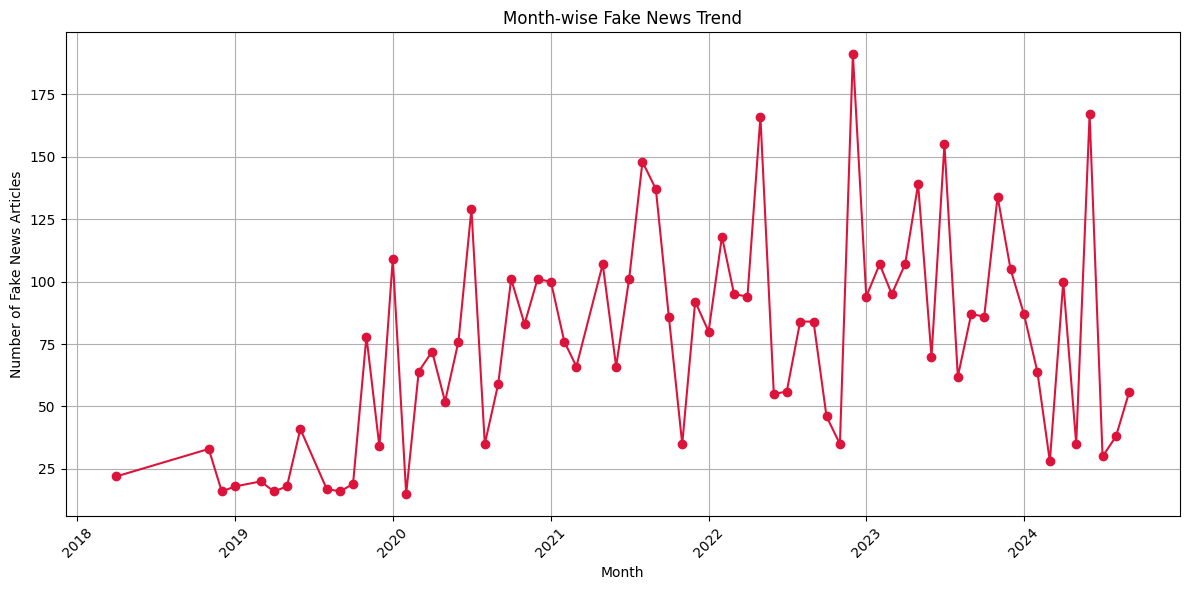

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Publish Dates' to datetime
df_final['Publish Dates'] = pd.to_datetime(df_final['Publish Dates'], errors='coerce', dayfirst=True)

# Filter only fake news
df_fake = df_final[df_final['Fake News(Yes/No)'] == 1]

# Group by Year-Month
monthly_counts = df_fake['Publish Dates'].dt.to_period('M').value_counts().sort_index()

# Convert to proper datetime index for plotting
monthly_counts.index = monthly_counts.index.to_timestamp()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', color='crimson')
plt.title('Month-wise Fake News Trend')
plt.xlabel('Month')
plt.ylabel('Number of Fake News Articles')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


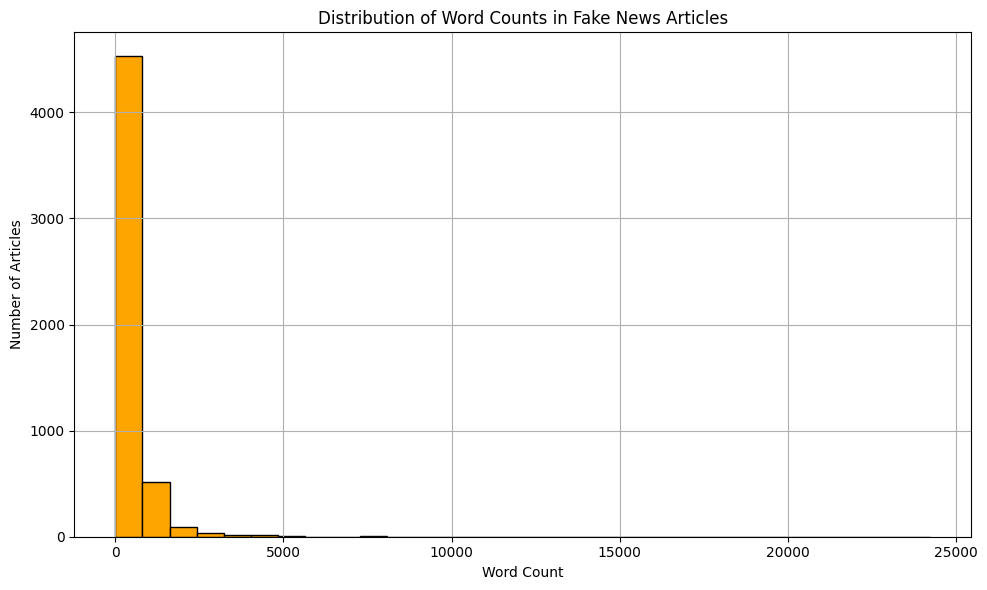

In [22]:
import matplotlib.pyplot as plt

# Filter only fake news
fake_news = df_final[df_final['Fake News(Yes/No)'] == 1]

# Plot histogram of word counts
plt.figure(figsize=(10, 6))
plt.hist(fake_news['word_count'], bins=30, color='Orange', edgecolor='black')
plt.title('Distribution of Word Counts in Fake News Articles')
plt.xlabel('Word Count')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
# import matplotlib.pyplot as plt

# # Separate fake and real news
# fake_news = df_final[df_final['Fake News(Yes/No)'] == 1]
# real_news = df_final[df_final['Fake News(Yes/No)'] == 0]

# # Plot overlapping histograms
# plt.figure(figsize=(10, 6))
# plt.hist(real_news['word_count'], bins=30, alpha=0.6, label='Real News', color='blue', edgecolor='black')
# plt.hist(fake_news['word_count'], bins=30, alpha=0.6, label='Fake News', color='red', edgecolor='black')
# plt.title('Word Count Distribution: Fake vs Real News')
# plt.xlabel('Word Count')
# plt.ylabel('Number of Articles')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()
